<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Feature Selection </h2>	


<h4> In this section, we would like you to select between 15 and 20 features to focus your model on. This will require significant explatoratory research. The first one is already implemented for you, and the next two are pre-specified.  </h4>

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [134]:
def ft0(image):
    return image.size
# Returns the pixel size of the image
def ft1(image):
    return np.mean([[pixel[0] for pixel in row] for row in image])
# Returns the average of the red-channel pictures for the images
def ft2(image):
    return np.mean([[pixel[1] for pixel in row] for row in image])
# Returns the average of the green-channel pictures for the images
def ft3(image):
    return np.mean([[pixel[2] for pixel in row] for row in image])
# Returns the average of the blue-channel pictures for the images
def ft4(image):
    return image.shape[1]/image.shape[0];
#Returns the aspect ratio of the image

In [135]:
# Load in data
starting_data = pd.read_hdf('starting_data.h5')

In [136]:
# For info
data_file_path = "C:data/20_categories_training"
categories = [dir_name for dir_name in os.listdir(data_file_path)]
print(categories)

['.DS_Store', '._.DS_Store', 'airplanes', 'bear', 'blimp', 'comet', 'crab', 'dog', 'dolphin', 'giraffe', 'goat', 'gorilla', 'kangaroo', 'killer-whale', 'leopards', 'llama', 'penguin', 'porcupine', 'teddy-bear', 'triceratops', 'unicorn', 'zebra']


In [137]:
# Remove images that are not correctly formatted
bool_index = [len(np.shape(image))!=3 for image in starting_data['image']]
remove_index = starting_data.loc[bool_index].index.tolist()
starting_data.drop(remove_index, inplace=True)

Define more features above, performing any EDA research below. We expect all external sources sited, and a couple significant different graphs indicating some form of EDA. 

<h4> Graphs </h4>

In [138]:
# Exploration of data!

# Examining trends in average color channel

# Compute the average red-channel for each image
starting_data['red_average'] = pd.Series([ft1(image) for image in starting_data['image']])

# Compute the average green-channel for each image
starting_data['green_average'] = pd.Series([ft2(image) for image in starting_data['image']])

# Compute the average blue-channel for each image
starting_data['blue_average'] = pd.Series([ft3(image) for image in starting_data['image']])

In [140]:
# Reorganize color variable into hue column
starting_data_colored = starting_data.copy()
if not 'new_index' in starting_data_colored:
    starting_data_colored.reset_index(inplace=True)
    starting_data_colored.rename(columns={'index':'new_index'}, inplace=True)

starting_data_colored = pd.melt(starting_data, id_vars=['new_index', 'image', 'label'],
                               value_vars=['red_average', 'green_average', 'blue_average'])
starting_data_colored.rename(columns={'variable':'color'}, inplace=True)

C:\ProgramData\Anaconda3\envs\data100\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Text(27.3264,0.5,'Average Color Channel Value')

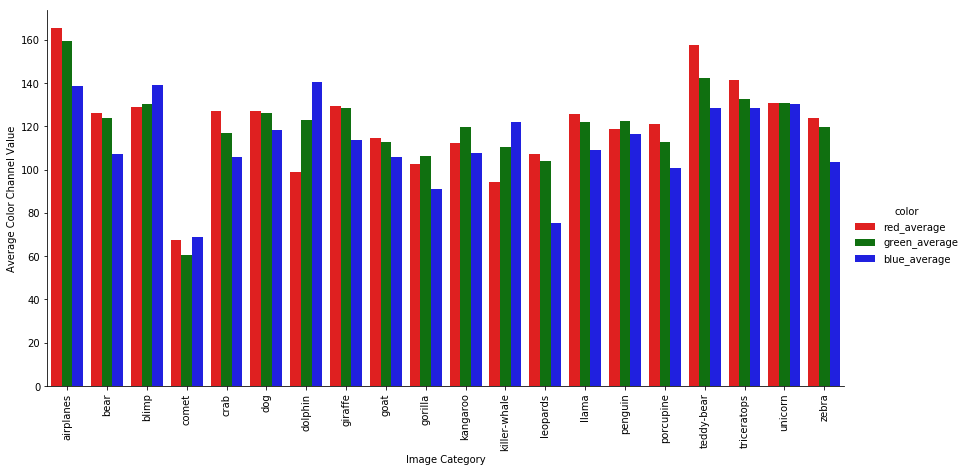

In [141]:
#sns.barplot(starting_data.groupby(['label']).mean().reset_index()['label'],
#           starting_data.groupby(['label']).mean()['red_average'])
#plt.xticks(np.arange(0,20), categories[2:], rotation=90)

plt.figure(figsize=[12,12])
sns.catplot(x='label', y='value', hue='color', data=starting_data_colored,
            kind='bar', palette=['r','g','b'], height=6, aspect=2, ci=None)
plt.xticks(np.arange(0,20), categories[2:], rotation=90)
plt.xlabel('Image Category')
plt.ylabel('Average Color Channel Value')

<h4> Sources </h4>

<h4> DataFrame Creation </h4>

In [2]:
def feature_frame(df):
    return df
    #Returns data-frame with all the features now inside, and calculated


In [3]:
feature_frame(data_from_nb1)

NameError: name 'starting_data' is not defined